In [1]:
import os
import csv
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
if os.path.exists("dc.csv"):
    os.remove("dc.csv")
if os.path.exists("dc-wikia-data.csv"):
    os.remove("dc-wikia-data.csv")
api = KaggleApi()
api.authenticate()
api.dataset_download_file('fivethirtyeight/fivethirtyeight-comic-characters-dataset', 'dc-wikia-data.csv')
with zipfile.ZipFile("dc-wikia-data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()
os.remove("dc-wikia-data.csv.zip")

In [2]:
data = pd.read_csv('dc-wikia-data.csv')
to_drop = ['page_id', 'urlslug', 'GSM', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR']
data.drop(to_drop, inplace =True, axis=1)
data.dropna(subset = ['ALIGN'], inplace = True)
data.ALIGN.replace(['Neutral Characters' , 'Good Characters', 'Bad Characters'] , [0, 0, 1], inplace = True )
data.to_csv('dc.csv', sep = ',')
os.remove("dc-wikia-data.csv")
prid = pd.read_csv("dc.csv")

Black Hair               1460
Brown Hair               1023
Blond Hair                689
Red Hair                  423
White Hair                316
Grey Hair                 138
Green Hair                 40
Blue Hair                  39
Purple Hair                31
Strawberry Blond Hair      26
Orange Hair                20
Pink Hair                  10
Gold Hair                   5
Violet Hair                 4
Reddish Brown Hair          3
Silver Hair                 2
Platinum Blond Hair         2
Name: HAIR, dtype: int64


array([<AxesSubplot:title={'center':'HAIR'}>], dtype=object)

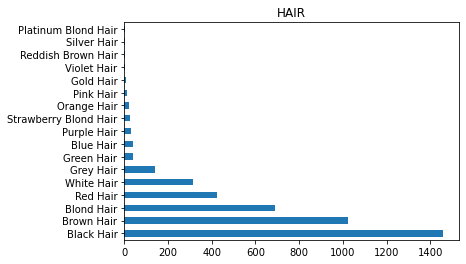

In [3]:
g1 = prid['HAIR'].value_counts()
print(g1)
g1.plot.barh(subplots=True)

Blue Eyes             1018
Brown Eyes             797
Black Eyes             394
Green Eyes             264
Red Eyes               200
White Eyes             110
Yellow Eyes             82
Photocellular Eyes      47
Grey Eyes               38
Hazel Eyes              23
Purple Eyes             13
Violet Eyes             11
Gold Eyes                9
Orange Eyes              8
Pink Eyes                6
Auburn Hair              6
Amber Eyes               4
Name: EYE, dtype: int64


array([<AxesSubplot:title={'center':'EYE'}>], dtype=object)

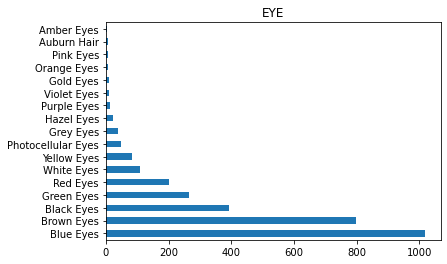

In [4]:
g2 = prid['EYE'].value_counts()
print(g2)
g2.plot.barh(subplots=True)

Male Characters           4427
Female Characters         1747
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64


array([<AxesSubplot:title={'center':'SEX'}>], dtype=object)

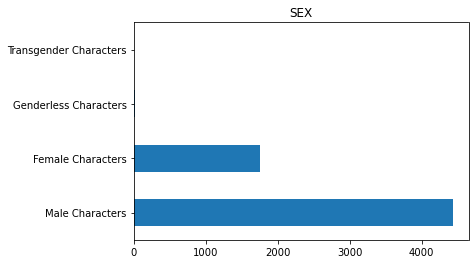

In [5]:
g3 = prid['SEX'].value_counts()
print(g3)
g3.plot.barh(subplots=True)

Public Identity     2282
Secret Identity     2259
Identity Unknown       9
Name: ID, dtype: int64


array([<AxesSubplot:title={'center':'ID'}>], dtype=object)

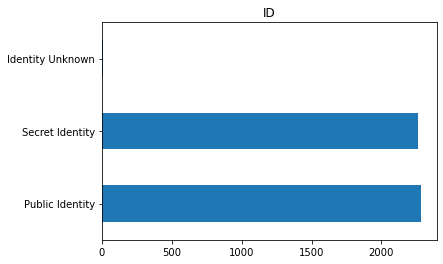

In [6]:
g4 = prid['ID'].value_counts()
print(g4)
g4.plot.barh(subplots=True)

Living Characters      4711
Deceased Characters    1582
Name: ALIVE, dtype: int64


array([<AxesSubplot:title={'center':'ALIVE'}>], dtype=object)

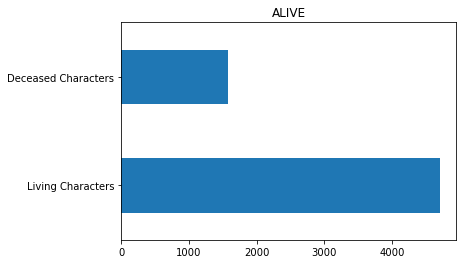

In [7]:
g5 = prid['ALIVE'].value_counts()
print(g5)
g5.plot.barh(subplots=True)